In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
#from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [2]:
df = pd.read_csv('Life_Expectancy_Data.csv')
df.head()

,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


# 1- EDA

In [3]:
df.shape

(2938, 22)

In [4]:
df.describe()

,Year,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [5]:
df.describe(include='object')

,Country,Status
count,2938,2938
unique,193,2
top,Afghanistan,Developing
freq,16,2426


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life_expectancy                  2928 non-null   float64
 4   Adult_Mortality                  2928 non-null   float64
 5   infant_deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

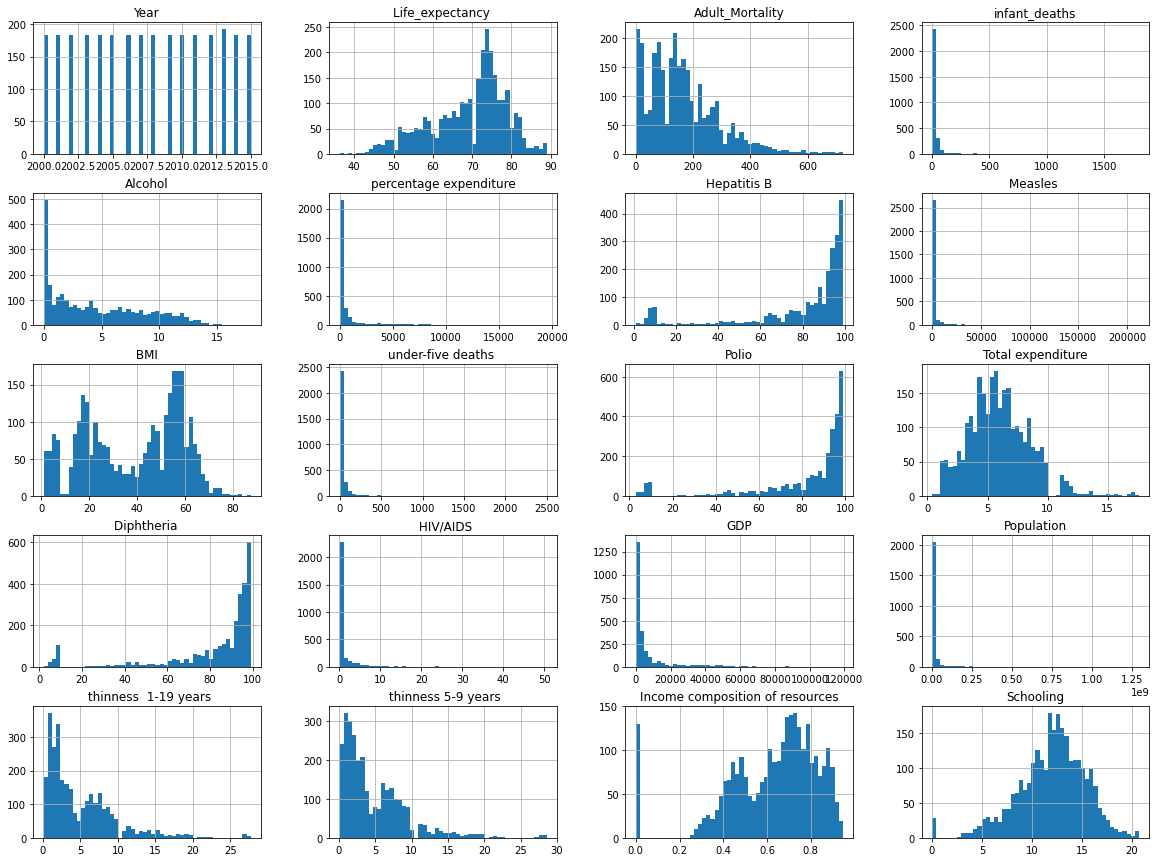

In [7]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [8]:
sum(df.duplicated())

0

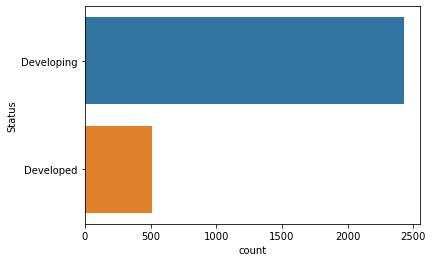

In [9]:
for column in df.select_dtypes(include='object'):
    if df[column].nunique() < 10:
        sns.countplot(y=column, data=df)
        plt.show()

In [10]:
for column in df.select_dtypes(include='object'):
    if df[column].nunique() < 10:
        display(df.groupby(column).mean())

,Year,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Status,,,,,,,,,,,,,,,,,,,,
Developed,2007.500000,79.197852,79.685547,1.494141,9.826736,2703.600380,88.041298,499.005859,51.803906,1.810547,93.736328,7.554042,93.476562,0.100000,22053.386446,6.830053e+06,1.320703,1.296680,0.852489,15.845474
Developing,2007.522671,67.111465,182.833195,36.384171,3.484119,323.470285,79.763930,2824.926216,35.435326,50.525144,80.170752,5.590694,79.951807,2.088664,4286.556053,1.407108e+07,5.592935,5.635242,0.582310,11.219256


In [11]:
corrs = df.corr()
corrs

,Year,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.170033,-0.079052,-0.037415,-0.052990,0.031400,0.104333,-0.082493,0.108974,-0.042937,0.094158,0.090740,0.134337,-0.139741,0.101620,0.016969,-0.047876,-0.050929,0.243468,0.209400
Life_expectancy,0.170033,1.000000,-0.696359,-0.196557,0.404877,0.381864,0.256762,-0.157586,0.567694,-0.222529,0.465556,0.218086,0.479495,-0.556556,0.461455,-0.021538,-0.477183,-0.471584,0.724776,0.751975
Adult_Mortality,-0.079052,-0.696359,1.000000,0.078756,-0.195848,-0.242860,-0.162476,0.031176,-0.387017,0.094146,-0.274823,-0.115281,-0.275131,0.523821,-0.296049,-0.013647,0.302904,0.308457,-0.457626,-0.454612
infant_deaths,-0.037415,-0.196557,0.078756,1.000000,-0.115638,-0.085612,-0.223566,0.501128,-0.227279,0.996629,-0.170689,-0.128616,-0.175171,0.025231,-0.108427,0.556801,0.465711,0.471350,-0.145139,-0.193720
Alcohol,-0.052990,0.404877,-0.195848,-0.115638,1.000000,0.341285,0.087549,-0.051827,0.330408,-0.112370,0.221734,0.296942,0.222020,-0.048845,0.354712,-0.035252,-0.428795,-0.417414,0.450040,0.547378
percentage expenditure,0.031400,0.381864,-0.242860,-0.085612,0.341285,1.000000,0.016274,-0.056596,0.228700,-0.087852,0.147259,0.174420,0.143624,-0.097857,0.899373,-0.025662,-0.251369,-0.252905,0.381952,0.389687
Hepatitis B,0.104333,0.256762,-0.162476,-0.223566,0.087549,0.016274,1.000000,-0.120529,0.150380,-0.233126,0.486171,0.058280,0.611495,-0.112675,0.083903,-0.123321,-0.120429,-0.124960,0.199549,0.231117
Measles,-0.082493,-0.157586,0.031176,0.501128,-0.051827,-0.056596,-0.120529,1.000000,-0.175977,0.507809,-0.136166,-0.106241,-0.141882,0.030899,-0.076466,0.265966,0.224808,0.221072,-0.129568,-0.137225
BMI,0.108974,0.567694,-0.387017,-0.227279,0.330408,0.228700,0.150380,-0.175977,1.000000,-0.237669,0.284569,0.242503,0.283147,-0.243717,0.301557,-0.072301,-0.532025,-0.538911,0.508774,0.546961
under-five deaths,-0.042937,-0.222529,0.094146,0.996629,-0.112370,-0.087852,-0.233126,0.507809,-0.237669,1.000000,-0.188720,-0.130148,-0.195668,0.038062,-0.112081,0.544423,0.467789,0.472263,-0.163305,-0.209373


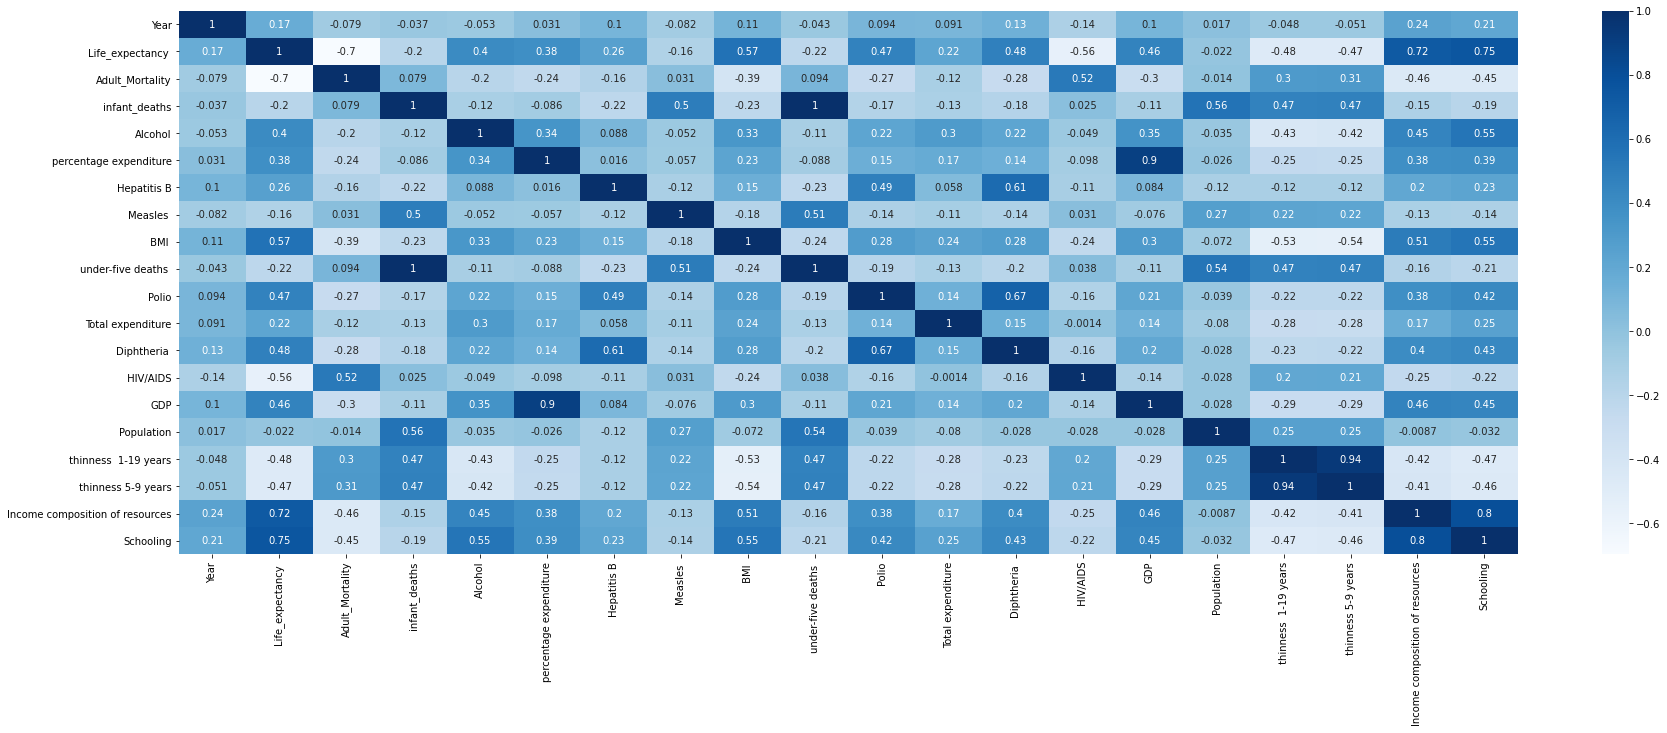

In [12]:
plt.figure(figsize=(30,10))
dataplot = sns.heatmap(corrs, cmap="Blues", annot=True)
plt.show()

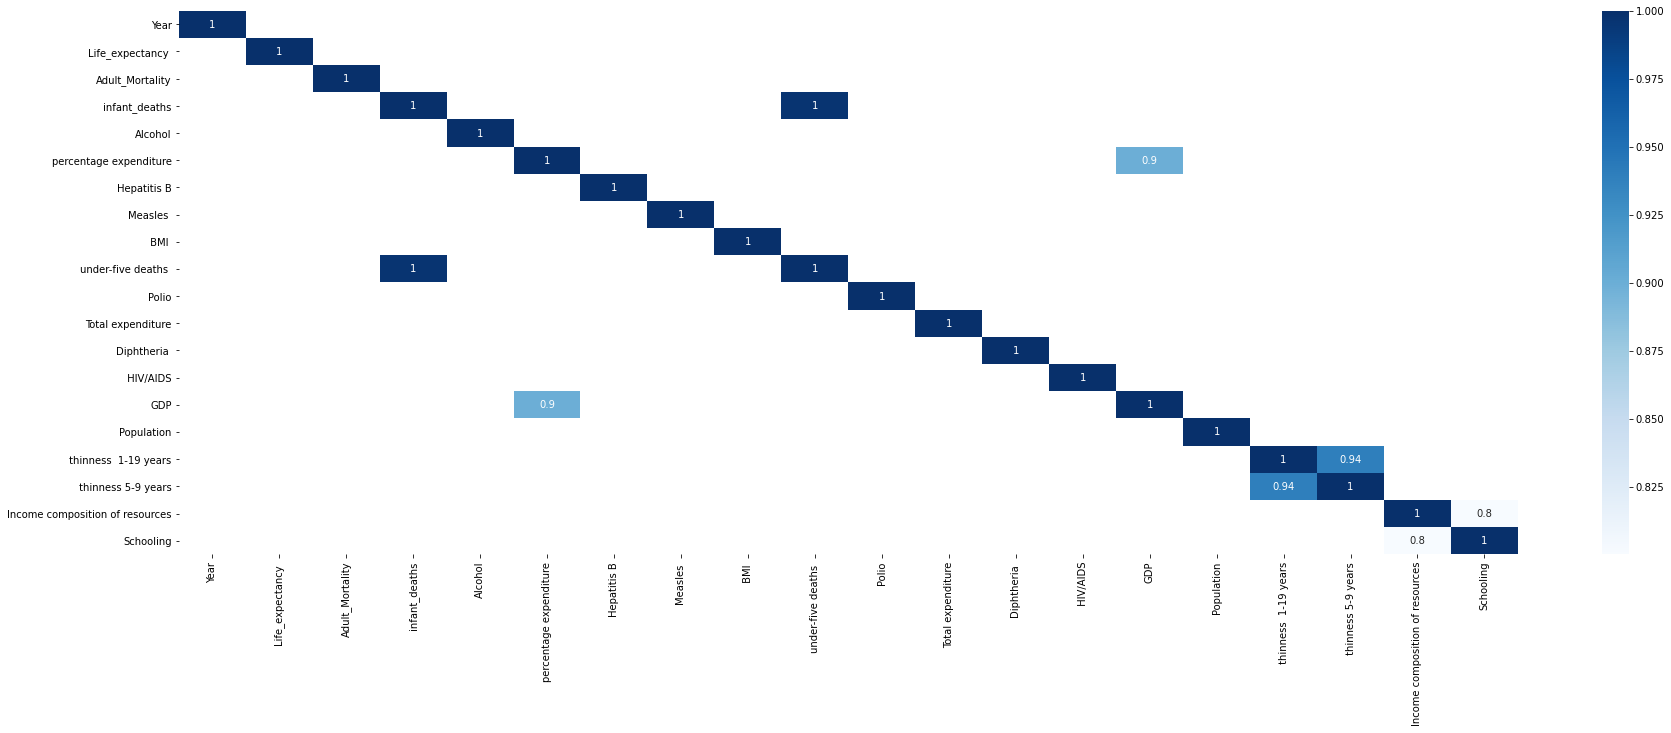

In [13]:
corr_matrix = df.corr().abs()

threshold = 0.8

filtered_corr_df = corr_matrix[(corr_matrix >= threshold)] 

plt.figure(figsize=(30,10))
sns.heatmap(filtered_corr_df, annot=True, cmap="Blues")
plt.show()

In [14]:
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life_expectancy                     10
Adult_Mortality                     10
infant_deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [15]:
cols = ['Life_expectancy ','Adult_Mortality','infant_deaths', 'Alcohol','percentage expenditure', 
             'Hepatitis B','Measles ', ' BMI ','under-five deaths ', 'Polio', 'Total expenditure',
             'Diphtheria ',' HIV/AIDS', 'GDP', 'Population',
             ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling'] 
for i in cols:
    q1 = df[i].quantile(0.25)
    q2 = df[i].quantile(0.75)
    iqr = q2-q1

    l = q1-1.5*iqr
    u = q2+1.5*iqr
    print(i , len(df[df[i] > u]))
    #print(df[df[i] > u])
    out1 = df[(df[i] < l)].values
    out2 = df[(df[i] > u)].values

    #df[i] = np.where(df[i]>u,u,np.where(df[i]<l,l,df[i]))
            

Life_expectancy  0
Adult_Mortality 82
infant_deaths 315
Alcohol 0
percentage expenditure 389
Hepatitis B 0
Measles  542
 BMI  0
under-five deaths  394
Polio 0
Total expenditure 32
Diphtheria  0
 HIV/AIDS 542
GDP 365
Population 294
 thinness  1-19 years 89
 thinness 5-9 years 96
Income composition of resources 0
Schooling 1


#### Country with highest and lowest life expectancy and in which year

In [16]:
high = df['Life_expectancy '].idxmax() 
high_data = pd.DataFrame(df.loc[high]) #to get the highest country in life expectancy

low = df['Life_expectancy '].idxmin()
low_data = pd.DataFrame(df.loc[low]) #to get the lowest country in life expectancy

In [17]:
q1 = pd.concat([high_data, low_data], axis=1)
q1

,241,1127
Country,Belgium,Haiti
Year,2014,2010
Status,Developed,Developing
Life_expectancy,89.0,36.3
Adult_Mortality,76.0,682.0
infant_deaths,0,23
Alcohol,12.6,5.76
percentage expenditure,7163.348923,36.292918
Hepatitis B,98.0,NaN
Measles,70,0


In [18]:
high_LE_Country = df.loc[high].Country
high_LE_Country

'Belgium'

In [19]:
low_LE_Country = df.loc[low].Country
low_LE_Country

'Haiti'

#### The highest country (Belgium) in life expectancy over the years

In [20]:
df_Belgium = df.loc[df['Country'] == high_LE_Country] #here we filtered the dataframe to belgium coutry only
df_Belgium.sort_index(inplace=True ,ascending=False) 
df_Belgium

C:\Users\Me.Amin\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:6402: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  key,


,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
255,Belgium,2000,Developed,77.6,11.0,1,11.21,287.208453,6.0,0,...,96.0,8.12,95.0,0.1,2327.45910,125125.0,0.8,0.8,0.869,18.0
254,Belgium,2001,Developed,78.0,1.0,1,11.01,2943.375396,6.0,83,...,96.0,8.29,95.0,0.1,23121.56635,128657.0,0.8,0.8,0.873,18.2
253,Belgium,2002,Developed,78.0,99.0,1,11.29,320.317766,6.0,0,...,96.0,8.46,95.0,0.1,2552.33280,1332785.0,0.8,0.8,0.875,18.8
252,Belgium,2003,Developed,78.3,95.0,0,11.28,507.306164,64.0,44,...,96.0,9.30,95.0,0.1,3743.95693,1376133.0,0.8,0.8,0.878,18.6
251,Belgium,2004,Developed,78.8,91.0,1,12.05,5160.508378,64.0,61,...,96.0,9.32,95.0,0.1,35589.71295,1421137.0,0.8,0.8,0.880,18.8
250,Belgium,2005,Developed,78.9,89.0,0,12.27,5068.214488,77.0,26,...,97.0,9.24,97.0,0.1,36967.28292,1478617.0,0.8,0.8,0.861,15.7
249,Belgium,2006,Developed,79.4,85.0,0,10.98,5579.199083,94.0,15,...,99.0,9.17,98.0,0.1,38852.36130,1547958.0,0.8,0.8,0.865,15.7
248,Belgium,2007,Developed,79.5,86.0,0,10.25,640.356092,94.0,64,...,99.0,9.25,98.0,0.1,4443.83131,16257.0,0.8,0.8,0.871,15.8
247,Belgium,2008,Developed,79.5,87.0,0,10.47,7191.051507,98.0,98,...,99.0,9.60,99.0,0.1,48424.58927,179973.0,0.8,0.8,0.874,15.8
246,Belgium,2009,Developed,79.8,85.0,0,10.05,671.937657,97.0,33,...,98.0,1.39,98.0,0.1,4488.56150,1796493.0,0.9,0.9,0.876,15.8


#### The immunization coverage in all the countries

In [21]:
immunization = df[['Country','Year','Life_expectancy ', 'Hepatitis B', 'Polio', 'Diphtheria ']]
immunization


,Country,Year,Life_expectancy,Hepatitis B,Polio,Diphtheria
0,Afghanistan,2015,65.0,65.0,6.0,65.0
1,Afghanistan,2014,59.9,62.0,58.0,62.0
2,Afghanistan,2013,59.9,64.0,62.0,64.0
3,Afghanistan,2012,59.5,67.0,67.0,67.0
4,Afghanistan,2011,59.2,68.0,68.0,68.0
...,...,...,...,...,...,...
2933,Zimbabwe,2004,44.3,68.0,67.0,65.0
2934,Zimbabwe,2003,44.5,7.0,7.0,68.0
2935,Zimbabwe,2002,44.8,73.0,73.0,71.0
2936,Zimbabwe,2001,45.3,76.0,76.0,75.0


C:\Users\Me.Amin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


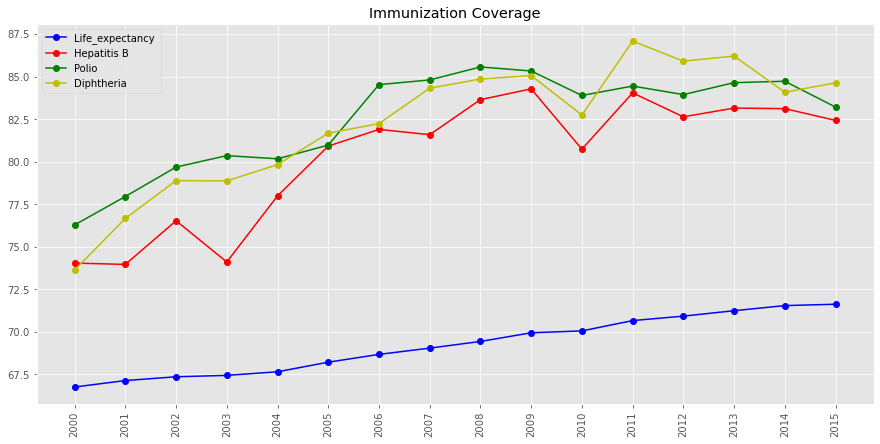

In [22]:
# make a copy of df_clean dataframe
df_t = immunization.copy()
df_t.index = df_t['Year']
df_t.drop(columns='Year',  inplace=True)
df_t.sort_index(inplace=True)

#create a new dataframe with the 4 target columns
data_to_plot = df_t.groupby([(df_t.index)])['Life_expectancy ', 'Hepatitis B', 'Polio', 'Diphtheria '].mean()
idx = data_to_plot.index 
le = data_to_plot['Life_expectancy ']
hp = data_to_plot['Hepatitis B']
pol = data_to_plot['Polio']
di = data_to_plot['Diphtheria ']


plt.style.use('ggplot')
plt.figure(figsize=(15,7))
plt.plot(idx, le, '-bo', label='Life_expectancy ')
plt.plot(idx, hp, '-ro', label='Hepatitis B')
plt.plot(idx, pol, '-go', label='Polio')
plt.plot(idx, di, '-yo', label='Diphtheria')

plt.title('Immunization Coverage')
plt.legend()
plt.xticks(idx,rotation=90)

plt.show()

#### Life expectancy histogram for all countries

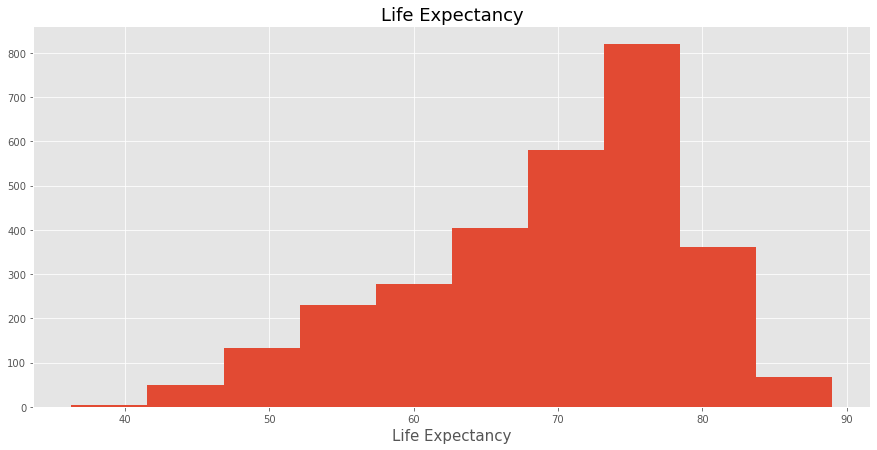

In [23]:
plt.style.use('ggplot') # gray background grid
plt.figure(figsize=(15,7))
plt.hist(df['Life_expectancy '])
plt.xlabel('Life Expectancy', fontsize = 15) 
plt.title('Life Expectancy', fontsize=18)
plt.show()

#### Average life expectancy in every country

In [24]:
x = df['Country'].unique() # a list of all country names
#here we loop in every country and find its average life expectancy
li= []
for i in x:
    li.append(df.loc[df['Country'] == i]['Life_expectancy '].mean())
              
              
Average_LE = pd.DataFrame(li, x, columns= ['Average_LE'])
Average_LE

,Average_LE
Afghanistan,58.19375
Albania,75.15625
Algeria,73.61875
Angola,49.01875
Antigua and Barbuda,75.05625
...,...
Venezuela (Bolivarian Republic of),73.38750
Viet Nam,74.77500
Yemen,63.86250
Zambia,53.90625


#### Highest average life expectancy (Japan)

In [25]:
#to get the country that have the highest average Life expectancy over the years
h = li.index(max(li))

highest_coutry = x[h]
highest_coutry

'Japan'

In [26]:
df.loc[df['Country'] == 'Japan']

,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1314,Japan,2015,Developed,83.7,55.0,2,NaN,0.000000,NaN,35,...,99.0,NaN,96.0,0.1,34474.13736,127141.0,2.1,1.8,0.902,15.3
1315,Japan,2014,Developed,83.5,57.0,2,0.01,88.833622,NaN,462,...,99.0,1.23,96.0,0.1,3896.21151,127276.0,2.0,1.7,0.899,15.3
1316,Japan,2013,Developed,83.5,56.0,2,7.55,94.434286,NaN,229,...,99.0,1.25,96.0,0.1,4454.44746,127445.0,2.0,1.7,0.894,15.3
1317,Japan,2012,Developed,83.3,58.0,2,7.39,121.586916,NaN,228,...,99.0,1.17,97.0,0.1,4863.47665,127629.0,1.9,1.7,0.889,15.3
1318,Japan,2011,Developed,82.5,64.0,3,7.39,9498.729062,NaN,434,...,96.0,1.70,97.0,0.1,48167.99727,127833.0,1.9,1.6,0.884,15.1
1319,Japan,2010,Developed,83.0,62.0,3,6.90,863.006149,NaN,450,...,98.0,9.58,97.0,0.1,4457.67639,1287.0,1.9,1.6,0.879,15.1
1320,Japan,2009,Developed,83.0,64.0,3,7.09,899.178528,NaN,741,...,99.0,9.51,97.0,0.1,4855.17564,12847.0,1.8,1.6,0.881,15.0
1321,Japan,2008,Developed,82.7,66.0,3,7.11,7313.175418,NaN,11015,...,98.0,8.60,98.0,0.1,39339.29757,12863.0,1.8,1.5,0.880,15.0
1322,Japan,2007,Developed,82.6,67.0,3,7.29,6599.995239,NaN,0,...,97.0,8.25,98.0,0.1,35275.22843,1281.0,1.8,1.5,0.877,15.0
1323,Japan,2006,Developed,82.4,68.0,3,7.49,6502.136974,NaN,520,...,95.0,8.19,98.0,0.1,35433.98896,127854.0,1.7,1.5,0.873,14.9


#### Lowest average life expectancy (sierra leone)

In [27]:
#to get the country that have the lowest average Life expectancy over the years
l= li.index(min(li))

lowest_country = x[l]
lowest_country

'Sierra Leone'

In [28]:
df.loc[df['Country'] == lowest_country]

,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2297,Sierra Leone,2015,Developing,51.0,413.0,22,NaN,0.000000,86.0,607,...,86.0,NaN,86.0,0.5,587.538233,723725.0,7.4,7.3,0.431,9.5
2298,Sierra Leone,2014,Developing,48.1,463.0,23,0.01,1.443286,83.0,1006,...,83.0,11.90,83.0,0.6,78.439476,779162.0,7.5,7.4,0.426,9.5
2299,Sierra Leone,2013,Developing,54.0,47.0,23,0.01,1.321464,92.0,15,...,92.0,11.59,92.0,0.8,71.818700,692279.0,7.7,7.6,0.413,9.3
2300,Sierra Leone,2012,Developing,49.7,411.0,25,0.01,54.560337,91.0,678,...,91.0,11.24,91.0,0.9,561.898424,676613.0,7.9,7.8,0.401,9.1
2301,Sierra Leone,2011,Developing,48.9,418.0,26,3.78,54.665917,89.0,1865,...,88.0,11.98,89.0,1.3,445.525000,6611692.0,8.1,8.0,0.392,8.9
2302,Sierra Leone,2010,Developing,48.1,424.0,27,3.84,5.347718,86.0,1089,...,84.0,1.32,86.0,1.6,45.128418,645872.0,8.3,8.2,0.384,8.7
2303,Sierra Leone,2009,Developing,47.1,433.0,28,3.97,49.837127,84.0,31,...,81.0,13.13,84.0,1.7,394.593244,63126.0,8.5,8.4,0.375,8.5
2304,Sierra Leone,2008,Developing,46.2,441.0,29,3.91,5.379606,77.0,44,...,75.0,1.29,77.0,1.9,46.375918,6165372.0,8.7,8.7,0.367,8.3
2305,Sierra Leone,2007,Developing,45.3,45.0,29,3.86,45.571089,63.0,0,...,63.0,1.12,64.0,2.2,358.827472,615417.0,8.9,8.9,0.357,8.2
2306,Sierra Leone,2006,Developing,44.3,464.0,30,3.80,38.000758,NaN,33,...,65.0,1.68,64.0,2.2,322.313468,5848692.0,9.1,9.1,0.348,8.0


#### Life Expectancy compared with drinking alcohol

In [29]:
alcohol = df[['Year','Life_expectancy ', 'Alcohol']]
alcohol

,Year,Life_expectancy,Alcohol
0,2015,65.0,0.01
1,2014,59.9,0.01
2,2013,59.9,0.01
3,2012,59.5,0.01
4,2011,59.2,0.01
...,...,...,...
2933,2004,44.3,4.36
2934,2003,44.5,4.06
2935,2002,44.8,4.43
2936,2001,45.3,1.72


#### Development and developing countries according to life expectancy

In [30]:
developed = df.loc[df['Status'] == 'Developed']['Life_expectancy '].mean()
developing = df.loc[df['Status'] == 'Developing']['Life_expectancy '].mean()

print(developed)
print(developing)

79.19785156249996
67.11146523178817


In [31]:
df_developed = df.loc[df['Status'] == 'Developed'][['Year','Life_expectancy ']]

df_developing = df.loc[df['Status'] == 'Developing'][['Year','Life_expectancy ']]
df_developed

,Year,Life_expectancy
112,2015,82.8
113,2014,82.7
114,2013,82.5
115,2012,82.3
116,2011,82.0
...,...,...
2805,2004,77.5
2806,2003,77.2
2807,2002,77.0
2808,2001,76.9


In [32]:
df_developing

,Year,Life_expectancy
0,2015,65.0
1,2014,59.9
2,2013,59.9
3,2012,59.5
4,2011,59.2
...,...,...
2933,2004,44.3
2934,2003,44.5
2935,2002,44.8
2936,2001,45.3


# 2- Feature Engineering
(fill null values, normalization, standardization, removing outliers)

In [33]:
#removing oitliers
for i in cols:
    q1 = df[i].quantile(0.25)
    q2 = df[i].quantile(0.75)
    iqr = q2-q1

    l = q1-1.5*iqr
    u = q2+1.5*iqr
    #print(i , len(df[df[i] > u]))
    #print(df[df[i] > u])
    out1 = df[(df[i] < l)].values
    out2 = df[(df[i] > u)].values

    df[i] = np.where(df[i]>u,u,np.where(df[i]<l,l,df[i]))
    print(i , len(df[df[i] > u]))


Life_expectancy  0
Adult_Mortality 0
infant_deaths 0
Alcohol 0
percentage expenditure 0
Hepatitis B 0
Measles  0
 BMI  0
under-five deaths  0
Polio 0
Total expenditure 0
Diphtheria  0
 HIV/AIDS 0
GDP 0
Population 0
 thinness  1-19 years 0
 thinness 5-9 years 0
Income composition of resources 0
Schooling 0


In [34]:
df_num = df.drop(['Country', 'Year', 'Status'], axis = 1)

num_pipeline = Pipeline([
        #('Outlier_removal', FunctionSampler(func=remove_outlier)),
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
        ('normalization', MinMaxScaler()),
    ])

df_num_tr = num_pipeline.fit_transform(df_num)

In [35]:
df_cat = df[['Country','Year', 'Status']]

cat_pipeline = Pipeline([
        ('encoder', OneHotEncoder(sparse=False)),
    ])

df_cat_tr = cat_pipeline.fit_transform(df_cat)

In [36]:
n = pd.DataFrame(df_num_tr,columns=['Life_expectancy ','Adult_Mortality','infant_deaths', 'Alcohol','percentage expenditure', 
             'Hepatitis B','Measles ', ' BMI ','under-five deaths ', 'Polio', 'Total expenditure',
             'Diphtheria ',' HIV/AIDS', 'GDP', 'Population',
             ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']  ,index=df.index )

c = pd.DataFrame(df_cat_tr)

df_final = pd.concat([n, c], axis=1)
df_final

,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,...,201,202,203,204,205,206,207,208,209,210
0,0.464286,0.572052,1.000000,0.000000,0.064988,0.346154,1.000000,0.209733,1.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.350446,0.589520,1.000000,0.000000,0.067034,0.288462,0.546287,0.203940,1.000000,0.171717,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.350446,0.582969,1.000000,0.000000,0.066757,0.326923,0.477446,0.198146,1.000000,0.252525,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.341518,0.591703,1.000000,0.000000,0.071283,0.384615,1.000000,0.192352,1.000000,0.353535,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.334821,0.598253,1.000000,0.000000,0.006471,0.403846,1.000000,0.187717,1.000000,0.373737,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,0.002232,1.000000,0.490909,0.243561,0.000000,0.403846,0.034421,0.302433,0.600000,0.353535,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2934,0.006696,1.000000,0.472727,0.226764,0.000000,0.000000,1.000000,0.297798,0.585714,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2935,0.013393,0.157205,0.454545,0.247480,0.000000,0.500000,0.337543,0.293163,0.571429,0.474747,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2936,0.024554,1.000000,0.454545,0.095745,0.000000,0.557692,0.587370,0.288528,0.557143,0.535354,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# 3- Machine Learning Models

In [37]:
x = df_final.drop('Life_expectancy ',axis='columns')
y = df_final['Life_expectancy ']

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [38]:
pipeline_sgd=Pipeline([('SGD', SGDRegressor(learning_rate = 'adaptive'))])

pipeline_svm=Pipeline([('SVM', SVR())])

pipeline_forest=Pipeline([('Random_forest', RandomForestRegressor())])

In [39]:
pipelines = [pipeline_sgd, pipeline_svm, pipeline_forest]
pipe_dict = {0: 'SGD', 1: 'SVM', 2: 'Random_forest'}

In [40]:
for pipe in pipelines:
    pipe.fit(X_train, y_train);
for i,model in enumerate(pipelines):
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(X_test,y_test)));

SGD Test Accuracy: 0.9120451568396445
SVM Test Accuracy: 0.8917792942049092
Random_forest Test Accuracy: 0.9621650953704834


In [41]:
print(SGDRegressor().get_params().keys())
print(SVR().get_params().keys())
print(RandomForestRegressor().get_params().keys())

dict_keys(['alpha', 'average', 'early_stopping', 'epsilon', 'eta0', 'fit_intercept', 'l1_ratio', 'learning_rate', 'loss', 'max_iter', 'n_iter_no_change', 'penalty', 'power_t', 'random_state', 'shuffle', 'tol', 'validation_fraction', 'verbose', 'warm_start'])
dict_keys(['C', 'cache_size', 'coef0', 'degree', 'epsilon', 'gamma', 'kernel', 'max_iter', 'shrinking', 'tol', 'verbose'])
dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])


In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline


param_grid = [
{
#"n_estimators":[10,100,1000],
"max_depth":[5,8,15,25,30,None], 
#"min_samples_leaf":[1,2,5,10,15,100],
"max_leaf_nodes": [2, 5,10]
 },
    
 {
"max_depth":[5,8,15,25,30,None], 
"min_samples_leaf":[1,2,5,10,15,100], 
 }
 ]

forest_reg = RandomForestRegressor()

gridsearch = GridSearchCV(forest_reg, param_grid, cv=5, verbose=1,n_jobs=-1,  return_train_score=True) 
best_model = gridsearch.fit(X_train,y_train)
best_model.score(X_test,y_test)


Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   55.0s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:  1.5min finished


0.9630858202299218

In [43]:
print(gridsearch.score(X_test,y_test))
print(best_model.best_params_)

0.9630858202299218
{'max_depth': 25, 'min_samples_leaf': 1}


In [44]:
cvres = gridsearch.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.5861894870787412 {'max_depth': 5, 'max_leaf_nodes': 2}
0.8166102486293475 {'max_depth': 5, 'max_leaf_nodes': 5}
0.8820941285777726 {'max_depth': 5, 'max_leaf_nodes': 10}
0.5861436923947345 {'max_depth': 8, 'max_leaf_nodes': 2}
0.8170236803751771 {'max_depth': 8, 'max_leaf_nodes': 5}
0.8819132471343181 {'max_depth': 8, 'max_leaf_nodes': 10}
0.5853875643757767 {'max_depth': 15, 'max_leaf_nodes': 2}
0.8154121905973131 {'max_depth': 15, 'max_leaf_nodes': 5}
0.8813669714167673 {'max_depth': 15, 'max_leaf_nodes': 10}
0.5860614046674556 {'max_depth': 25, 'max_leaf_nodes': 2}
0.8144910193243794 {'max_depth': 25, 'max_leaf_nodes': 5}
0.8814609883129944 {'max_depth': 25, 'max_leaf_nodes': 10}
0.5864088312794767 {'max_depth': 30, 'max_leaf_nodes': 2}
0.8161925883505285 {'max_depth': 30, 'max_leaf_nodes': 5}
0.8817757682766498 {'max_depth': 30, 'max_leaf_nodes': 10}
0.5861577593073324 {'max_depth': None, 'max_leaf_nodes': 2}
0.8181239025462628 {'max_depth': None, 'max_leaf_nodes': 5}
0.881586629

In [45]:
feature_importances = gridsearch.best_estimator_.feature_importances_

In [46]:
from sklearn.ensemble import BaggingRegressor

model = RandomForestRegressor(max_depth = 25, min_samples_leaf =  1)


bgregressor = BaggingRegressor(base_estimator=model, n_estimators=1200,
                                 max_features=220,
                                 max_samples=200,
                                 random_state=1, n_jobs=5)


bgregressor.fit(X_train, y_train)

print('Model test Score: %.3f, ' %bgregressor.score(X_test, y_test),
      'Model training Score: %.3f' %bgregressor.score(X_train, y_train))

Model test Score: 0.910,  Model training Score: 0.920


In [1]:
# from sklearn.ensemble import BaggingRegressor

# model = RandomForestRegressor(max_depth = 25, min_samples_leaf =  1)


# bgregressor = BaggingRegressor(base_estimator=model, n_estimators=1500,
#                                  max_features=220,
#                                  max_samples=300,
#                                  random_state=1, n_jobs=-1)


# bgregressor.fit(X_train, y_train)

# print('Model test Score: %.3f, ' %bgregressor.score(X_test, y_test),
#       'Model training Score: %.3f' %bgregressor.score(X_train, y_train))